## Observations and Insights 

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head(None)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [124]:
# Checking the number of mice.
checkmice= combined_data['Mouse ID'].value_counts().count()
print(f'Number of Mice: {checkmice}')

Number of Mice: 249


In [125]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


check_dupmice = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
combined_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mice = combined_data[combined_data['Mouse ID'] == 'g989']
duplicates_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mice_data = combined_data.drop_duplicates(subset=(['Mouse ID', 'Timepoint'])).reset_index(drop=True)
mice_data = combined_data[combined_data['Mouse ID'] != 'g989']
mice_data.head(915)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
923,h246,Ketapril,Male,13,30,10,51.368862,1
924,h246,Ketapril,Male,13,30,15,56.184327,1
925,h246,Ketapril,Male,13,30,20,57.935912,1
926,h246,Ketapril,Male,13,30,25,59.548854,1


In [138]:
# Checking the number of mice in the clean DataFrame.
checkmice2 = mice_data["Mouse ID"].value_counts().count()
print(f'Number of Mice: {checkmice2}')

Number of Mice: 248


## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = mice_data.groupby(['Drug Regimen'])
tumorvar = "Tumor Volume (mm3)"
drug_mean = drug_group.mean()[tumorvar]
drug_median = drug_group.median()["Tumor Volume (mm3)"]
drug_var = drug_group.var()["Tumor Volume (mm3)"]
drug_std = drug_group.std()["Tumor Volume (mm3)"]
drug_sem = drug_group.sem()["Tumor Volume (mm3)"]

drug_table = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance": drug_var,
    "Standard Deviation": drug_std,
    "SEM": drug_sem,
})
drug_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

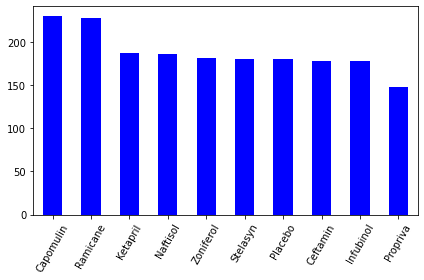

['Capomulin',
 'Ramicane',
 'Ketapril',
 'Naftisol',
 'Zoniferol',
 'Stelasyn',
 'Placebo',
 'Ceftamin',
 'Infubinol',
 'Propriva']

In [155]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drugs_bar = mice_data["Drug Regimen"].value_counts()
drug_names = drugs_bar.index.tolist()

drugs_bar.plot(kind="bar", color="b", rot=60)
plt.tight_layout()
#plt.title("Total Number of Measurements")
plt.show()
drugs_bar.head()

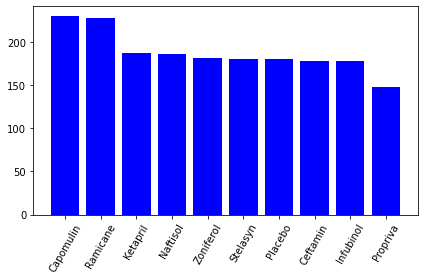

In [142]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#drug_names = 

x_axis = np.arange(len(drug_table))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drugs_bar, color="b", align="center")
plt.xticks(tick_locations, drug_names, rotation=60)
#plt.title("Total Number of Measurements")
plt.tight_layout()
plt.show()


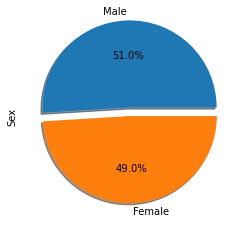

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1,0)
mice_sex = mice_data["Sex"].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, explode=explode)
#plt.title(f'Sex Distribution Male vs Female')
labels = ["Male", "Female"]

plt.show()

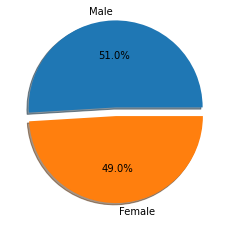

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = mice_data["Sex"].value_counts()


plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", shadow=True,explode=explode)
#plt.title('Sex Distribution Male vs Female')
plt.show()

## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


all_final = final_drugs['Tumor Volume (mm3)']
# Start by getting the last (greatest) timepoint for each mouse
final_drugs = mice_data.drop_duplicates(subset=['Mouse ID'], keep='last')
final_drugs


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []
#print(regi_list)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mice_data['Tumor Volume (mm3)'].quantile([0.25,.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f'Quartiles: {quartiles}')
print(f'IQR: {iqr}')

lower_bound = int(lowerq - (1.5*iqr))
upper_bound = int(upperq + (1.5*iqr))
print(f'Lower Bound: {lower_bound}' )
print(f'Upper Bound: {upper_bound}')
q_data = mice_data.loc[(mice_data['Tumor Volume (mm3)'] < lower_bound) | (mice_data['Tumor Volume (mm3)'] > upper_bound)]

    # Locate the rows which contain mice on each drug and get the tumor volumes
capo_final = final_drugs[final_drugs['Drug Regimen'] == 'Capomulin']
rami_final = final_drugs[final_drugs['Drug Regimen'] == 'Ramicane']
infu_final = final_drugs[final_drugs['Drug Regimen'] == 'Infubinol']
ceft_final = final_drugs[final_drugs['Drug Regimen'] == 'Ceftamin']

    

    # add subset 
    

    # Determine outliers using upper and lower bounds
q_data

Quartiles: 0.25    45.000000
0.50    48.933454
0.75    56.324075
Name: Tumor Volume (mm3), dtype: float64
IQR: 11.324075107499993
Lower Bound: 28
Upper Bound: 73


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
567,a818,Naftisol,Female,12,28,45,74.997764,2
610,b559,Naftisol,Male,20,26,45,73.051363,1
679,c402,Stelasyn,Female,1,27,45,74.040390,3
784,e227,Placebo,Male,1,30,45,73.212939,3
850,f545,Zoniferol,Female,20,26,45,73.324432,1


In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume: Target Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot()
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_data = mice_data[mice_data['Drug Regimen'] == 'Capomulin']
capo_mouse = capo_data.loc[capo_data['Mouse ID'] == 's185']



capo_time_list = list(capo_mouse['Timepoint'])
capo_vol_list = list(capo_mouse['Tumor Volume (mm3)'])

plt.plot(capo_time_list, capo_vol_list, marker='o', color='b')
plt.xlabel = "Timepoint"
plt.ylabel = "Tumor Volume"
plt.title = "Tumor Volume vs Timepoint \nMouse s185 treated with Capomulin"
plt.show()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
